In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
path='./resources/group 2.jpg'

## Reading colored image

In [3]:
#reading image in numpy array format
img=mpimg.imread(path)

In [4]:
#to display image
def display_img(img):
    plt.imshow(img)
    #removing axis
    plt.axis('off')
    plt.show()

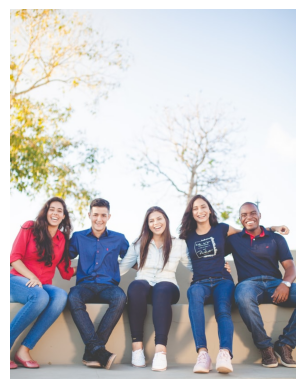

In [5]:
display_img(img)

In [6]:
img.shape

(828, 640, 3)

## Resizing Colord Image

In [7]:
import cv2

In [8]:
new_size=(64,64)

In [9]:
resized_img=cv2.resize(img,new_size)

In [10]:
resized_img.shape

(64, 64, 3)

## Showing the Image and Printing its value

In [11]:
resized_img

array([[[233, 232, 221],
        [200, 194, 127],
        [238, 225, 200],
        ...,
        [191, 213, 237],
        [189, 210, 237],
        [187, 208, 235]],

       [[235, 235, 240],
        [249, 241, 213],
        [236, 219, 177],
        ...,
        [195, 215, 239],
        [193, 213, 237],
        [191, 211, 236]],

       [[236, 236, 236],
        [238, 239, 243],
        [239, 233, 227],
        ...,
        [200, 218, 240],
        [199, 217, 239],
        [196, 215, 239]],

       ...,

       [[177,  90, 108],
        [133,  90,  93],
        [ 86,  78,  73],
        ...,
        [178, 172, 162],
        [198, 190, 180],
        [205, 188, 172]],

       [[170, 174, 177],
        [171, 175, 178],
        [176, 176, 178],
        ...,
        [165, 170, 173],
        [165, 171, 172],
        [167, 173, 173]],

       [[177, 181, 184],
        [180, 184, 187],
        [183, 187, 190],
        ...,
        [181, 186, 189],
        [181, 185, 186],
        [178, 184, 184]]

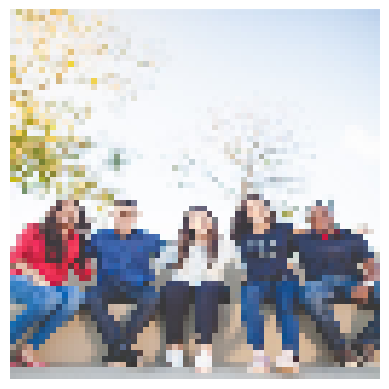

In [12]:
display_img(resized_img)

## Extracting RGB channels in different variables

In [13]:
r_chnl=resized_img[:,:,0]
g_chnl=resized_img[:,:,1]
b_chnl=resized_img[:,:,2]

### blue channel image

In [14]:
b_chnl

array([[221, 127, 200, ..., 237, 237, 235],
       [240, 213, 177, ..., 239, 237, 236],
       [236, 243, 227, ..., 240, 239, 239],
       ...,
       [108,  93,  73, ..., 162, 180, 172],
       [177, 178, 178, ..., 173, 172, 173],
       [184, 187, 190, ..., 189, 186, 184]], dtype=uint8)

In [15]:
b_chnl.shape

(64, 64)

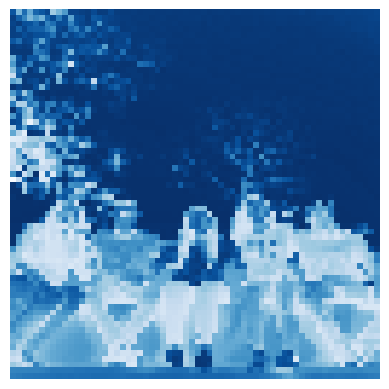

In [16]:
plt.imshow(b_chnl,cmap="Blues")
plt.axis('off')
plt.show()

### Green Channel Image

In [17]:
g_chnl

array([[232, 194, 225, ..., 213, 210, 208],
       [235, 241, 219, ..., 215, 213, 211],
       [236, 239, 233, ..., 218, 217, 215],
       ...,
       [ 90,  90,  78, ..., 172, 190, 188],
       [174, 175, 176, ..., 170, 171, 173],
       [181, 184, 187, ..., 186, 185, 184]], dtype=uint8)

In [18]:
g_chnl.shape

(64, 64)

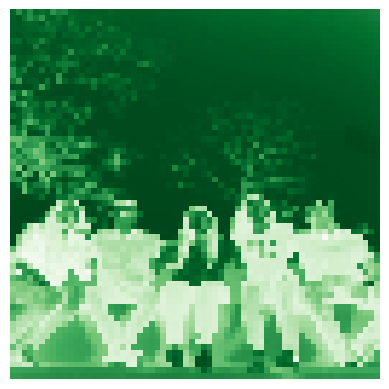

In [19]:
plt.imshow(g_chnl,cmap="Greens")
plt.axis('off')
plt.show()

### Red Channel Image

In [20]:
r_chnl

array([[233, 200, 238, ..., 191, 189, 187],
       [235, 249, 236, ..., 195, 193, 191],
       [236, 238, 239, ..., 200, 199, 196],
       ...,
       [177, 133,  86, ..., 178, 198, 205],
       [170, 171, 176, ..., 165, 165, 167],
       [177, 180, 183, ..., 181, 181, 178]], dtype=uint8)

In [21]:
r_chnl.shape

(64, 64)

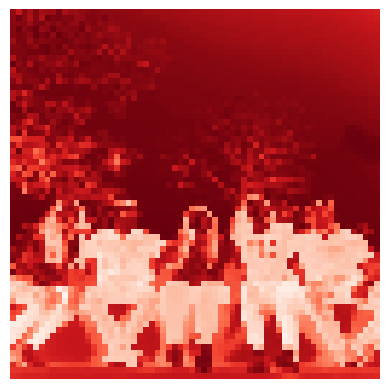

In [22]:
plt.imshow(r_chnl,cmap="Reds")
plt.axis('off')
plt.show()

# Transformations

## 1. Identity Transformation

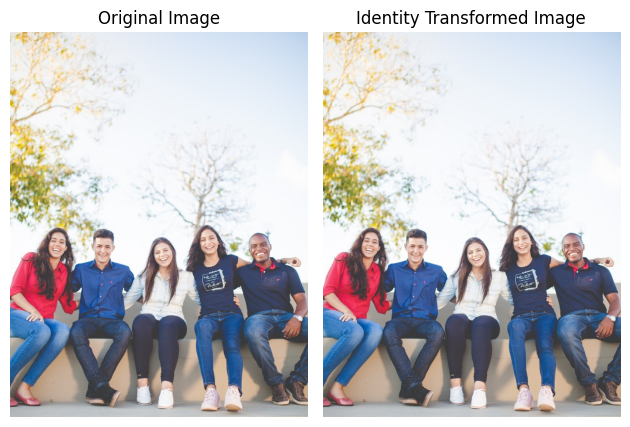

In [23]:
def plot_transformation(o_img,t_img,transformation):
    plt.subplot(1, 2, 1)
    plt.imshow(o_img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(t_img)
    plt.title(transformation)
    plt.axis('off')

    plt.tight_layout()
    plt.show()
identity_trans_img=img.copy()
plot_transformation(img,identity_trans_img,'Identity Transformed Image')

## 2. Scaling

In [24]:
import numpy as np

In [25]:
scaling_factor_x=0.25
scaling_factor_y=0.25

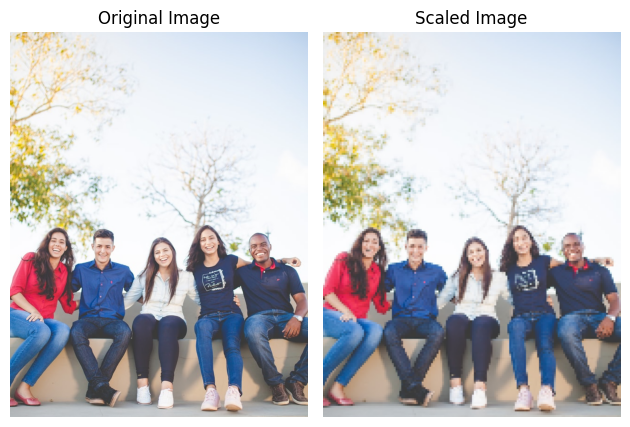

In [26]:
scaled_img=cv2.resize(img,None,fx=scaling_factor_x,fy=scaling_factor_y)
plot_transformation(img,scaled_img,'Scaled Image')

In [27]:
scaled_img.shape, img.shape

((207, 160, 3), (828, 640, 3))

## 3.Rotation

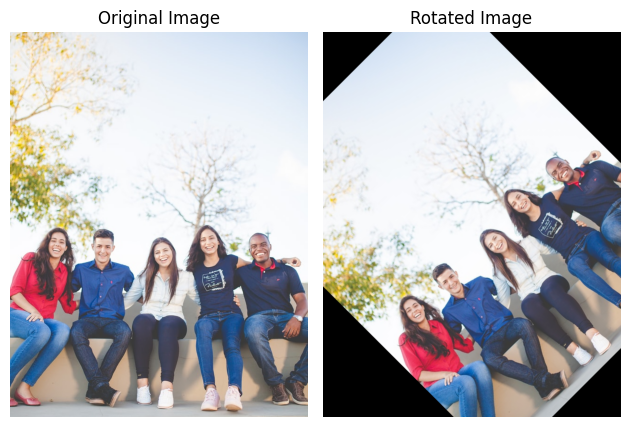

In [28]:
def rotate_image(image, angle):
    center = tuple(np.array(image.shape[1::-1]) / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)
    rotated_img = cv2.warpAffine(image, rotation_matrix, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return rotated_img

rotated_img=rotate_image(img,45)

plot_transformation(img,rotated_img,'Rotated Image')

## 4.Translation

In [29]:
def translate_image(image,x,y):
    translated_matrix=np.float32([[1,0,x],[0,1,y]])
    return cv2.warpAffine(image,translated_matrix,image.shape[1::-1])

In [30]:
translated_image=translate_image(img,60,120)

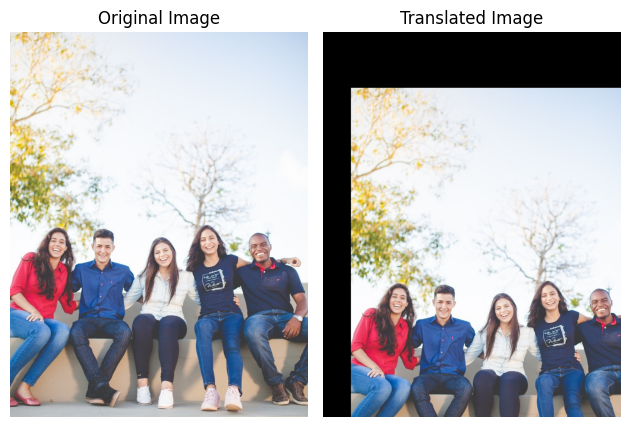

In [31]:
plot_transformation(img,translated_image,'Translated Image')

## 5. Horizontal Shearing

In [32]:
def horizontal_shear(image,shear_x):
    shear_mat = np.float32([[1, shear_x, 0],
                               [0, 1,       0]])
    return cv2.warpAffine(image, shear_mat, image.shape[1::-1])

In [33]:
horizontally_sheared_img=horizontal_shear(img,0.1)

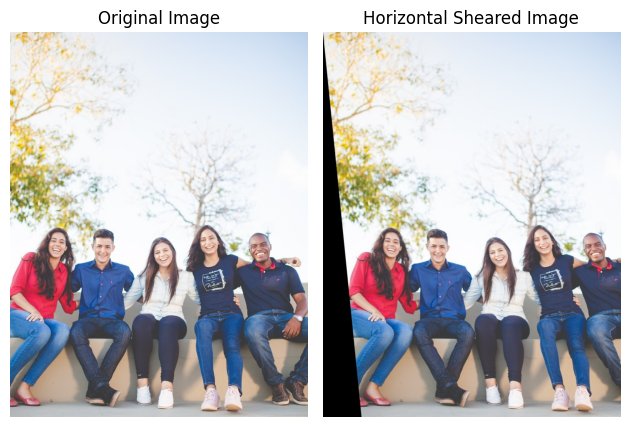

In [34]:
plot_transformation(img,horizontally_sheared_img,'Horizontal Sheared Image')

## 6. Vertical Shearing

In [35]:
def vertical_shear(image,shear_y):
    shear_mat = np.float32([[1, 0, 0],
                               [shear_y, 1,       0]])
    return cv2.warpAffine(image, shear_mat, image.shape[1::-1])

In [36]:
vertically_sheared_img=vertical_shear(img,0.1)

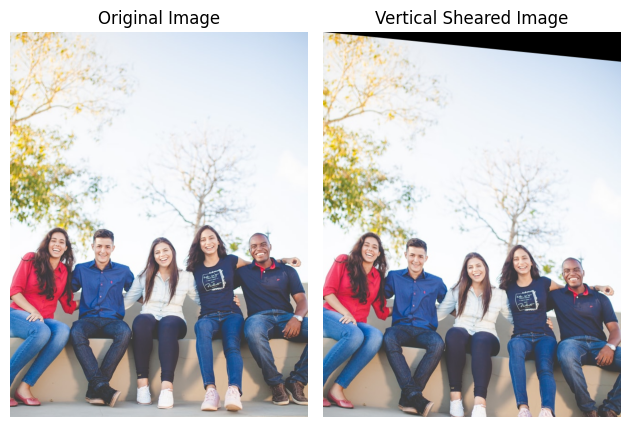

In [37]:
plot_transformation(img,vertically_sheared_img,'Vertical Sheared Image')

## Mean Filter

In [38]:
def mean_filter(image,kernel_size):
    return cv2.blur(img, (kernel_size, kernel_size))

In [39]:
mean_filtered_image=mean_filter(img,7)

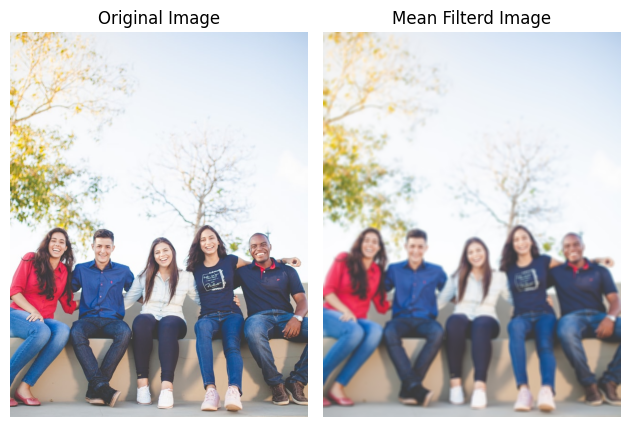

In [40]:
plot_transformation(img,mean_filtered_image,'Mean Filterd Image')

## Median Filter

In [41]:
def median_filter(image,kernel_size):
    return cv2.medianBlur(img,kernel_size)

In [42]:
median_filtered_image=median_filter(img,7)

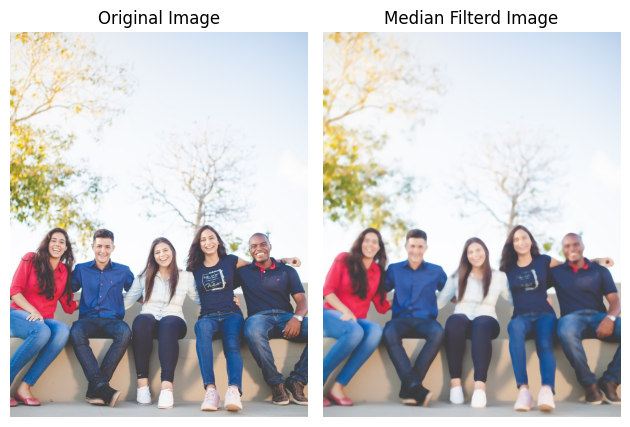

In [43]:
plot_transformation(img,median_filtered_image,'Median Filterd Image')

# Horizontal Equalization

In [44]:
img

array([[[234, 229, 235],
        [234, 232, 235],
        [231, 236, 232],
        ...,
        [183, 207, 233],
        [183, 207, 233],
        [182, 206, 232]],

       [[231, 226, 230],
        [232, 230, 231],
        [232, 234, 233],
        ...,
        [183, 207, 233],
        [183, 207, 233],
        [183, 207, 233]],

       [[226, 222, 219],
        [229, 228, 226],
        [231, 231, 233],
        ...,
        [183, 207, 233],
        [183, 207, 233],
        [183, 207, 233]],

       ...,

       [[180, 185, 188],
        [180, 185, 188],
        [180, 185, 188],
        ...,
        [181, 182, 177],
        [180, 181, 176],
        [178, 179, 174]],

       [[181, 186, 189],
        [181, 186, 189],
        [181, 186, 189],
        ...,
        [189, 186, 177],
        [188, 185, 176],
        [186, 183, 174]],

       [[181, 186, 189],
        [181, 186, 189],
        [181, 186, 189],
        ...,
        [195, 191, 180],
        [194, 190, 179],
        [192, 188, 177]]

In [45]:
arr = img.ravel()

# Counting unique values and their occurrences
unique_values, counts = np.unique(arr, return_counts=True)


<BarContainer object of 256 artists>

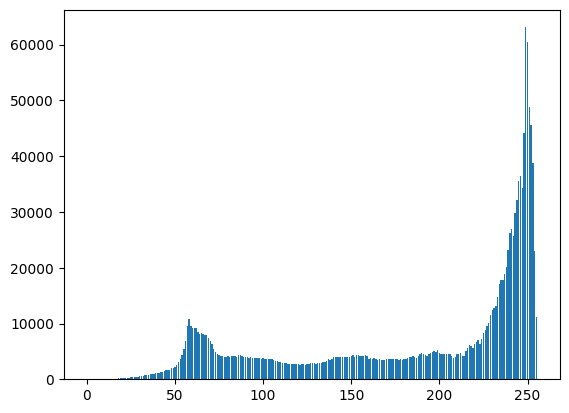

In [46]:
plt.bar(unique_values,counts)

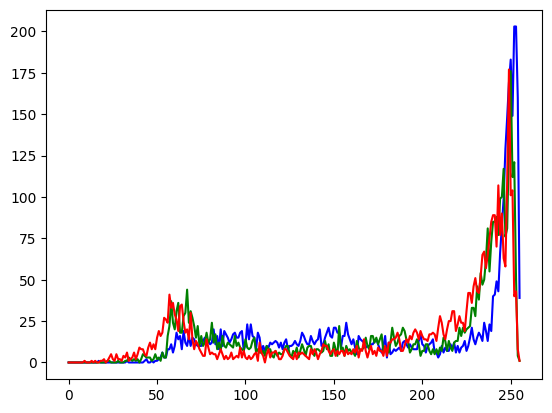

In [47]:
hist1=cv2.calcHist([b_chnl],[0],None,[256],[0,256])
plt.plot(hist1,color='b')
hist2=cv2.calcHist([g_chnl],[0],None,[256],[0,256])
plt.plot(hist2,color='g')
hist3=cv2.calcHist([r_chnl],[0],None,[256],[0,256])
plt.plot(hist3,color='r')
plt.show()

In [48]:
hsv_img=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
h,s,v=cv2.split(img)

In [49]:
v

array([[235, 235, 232, ..., 233, 233, 232],
       [230, 231, 233, ..., 233, 233, 233],
       [219, 226, 233, ..., 233, 233, 233],
       ...,
       [188, 188, 188, ..., 177, 176, 174],
       [189, 189, 189, ..., 177, 176, 174],
       [189, 189, 189, ..., 180, 179, 177]], dtype=uint8)

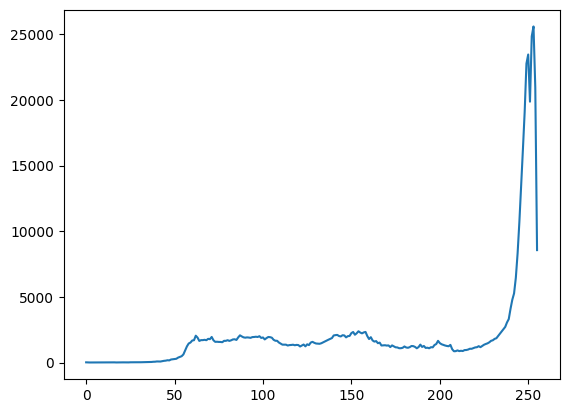

In [50]:
hist=cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

In [51]:
hist, bins = np.histogram(v.flatten(), 256, [0, 256])

In [52]:
hist

array([   13,     4,     2,     3,     2,     2,     2,     8,     3,
           5,     5,     3,     5,     9,     7,     8,    11,     4,
          10,     8,    12,    11,     9,    14,     8,    16,    13,
          18,    17,    22,    23,    20,    26,    31,    31,    33,
          39,    42,    56,    60,    80,    76,    74,   100,   127,
         141,   172,   160,   228,   248,   261,   284,   373,   423,
         480,   615,   926,  1229,  1448,  1521,  1676,  1700,  2042,
        1897,  1644,  1705,  1705,  1729,  1698,  1803,  1779,  1946,
        1694,  1573,  1581,  1567,  1565,  1546,  1651,  1650,  1699,
        1646,  1691,  1757,  1769,  1720,  1914,  2070,  1987,  1917,
        1891,  1914,  1901,  1879,  1936,  1944,  1963,  1944,  2003,
        1873,  1907,  1759,  1859,  1943,  1931,  1891,  1733,  1658,
        1654,  1522,  1443,  1360,  1360,  1359,  1294,  1327,  1336,
        1355,  1315,  1341,  1330,  1219,  1291,  1370,  1230,  1387,
        1327,  1517,

In [53]:
bins

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [54]:
# Probability Density Function p=nk/n
total_pixels=np.sum(hist)
total_pixels

529920

In [55]:
pdf=hist/total_pixels
pdf

array([2.45320048e-05, 7.54830918e-06, 3.77415459e-06, 5.66123188e-06,
       3.77415459e-06, 3.77415459e-06, 3.77415459e-06, 1.50966184e-05,
       5.66123188e-06, 9.43538647e-06, 9.43538647e-06, 5.66123188e-06,
       9.43538647e-06, 1.69836957e-05, 1.32095411e-05, 1.50966184e-05,
       2.07578502e-05, 7.54830918e-06, 1.88707729e-05, 1.50966184e-05,
       2.26449275e-05, 2.07578502e-05, 1.69836957e-05, 2.64190821e-05,
       1.50966184e-05, 3.01932367e-05, 2.45320048e-05, 3.39673913e-05,
       3.20803140e-05, 4.15157005e-05, 4.34027778e-05, 3.77415459e-05,
       4.90640097e-05, 5.84993961e-05, 5.84993961e-05, 6.22735507e-05,
       7.35960145e-05, 7.92572464e-05, 1.05676329e-04, 1.13224638e-04,
       1.50966184e-04, 1.43417874e-04, 1.39643720e-04, 1.88707729e-04,
       2.39658816e-04, 2.66077899e-04, 3.24577295e-04, 3.01932367e-04,
       4.30253623e-04, 4.67995169e-04, 4.92527174e-04, 5.35929952e-04,
       7.03879831e-04, 7.98233696e-04, 9.05797101e-04, 1.16055254e-03,
      

In [56]:
cdf=pdf.cumsum()
cdf

array([2.45320048e-05, 3.20803140e-05, 3.58544686e-05, 4.15157005e-05,
       4.52898551e-05, 4.90640097e-05, 5.28381643e-05, 6.79347826e-05,
       7.35960145e-05, 8.30314010e-05, 9.24667874e-05, 9.81280193e-05,
       1.07563406e-04, 1.24547101e-04, 1.37756643e-04, 1.52853261e-04,
       1.73611111e-04, 1.81159420e-04, 2.00030193e-04, 2.15126812e-04,
       2.37771739e-04, 2.58529589e-04, 2.75513285e-04, 3.01932367e-04,
       3.17028986e-04, 3.47222222e-04, 3.71754227e-04, 4.05721618e-04,
       4.37801932e-04, 4.79317633e-04, 5.22720411e-04, 5.60461957e-04,
       6.09525966e-04, 6.68025362e-04, 7.26524758e-04, 7.88798309e-04,
       8.62394324e-04, 9.41651570e-04, 1.04732790e-03, 1.16055254e-03,
       1.31151872e-03, 1.45493659e-03, 1.59458031e-03, 1.78328804e-03,
       2.02294686e-03, 2.28902476e-03, 2.61360205e-03, 2.91553442e-03,
       3.34578804e-03, 3.81378321e-03, 4.30631039e-03, 4.84224034e-03,
       5.54612017e-03, 6.34435386e-03, 7.25015097e-03, 8.41070350e-03,
      

In [57]:
norm_hist=np.round((cdf-cdf.min())*255)
norm_hist

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   2.,   2.,
         2.,   3.,   3.,   4.,   5.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  11.,  12.,  13.,  14.,  15.,  16.,  16.,  17.,  18.,  19.,
        19.,  20.,  21.,  22.,  23.,  23.,  24.,  25.,  26.,  27.,  28.,
        29.,  30.,  31.,  32.,  33.,  33.,  34.,  35.,  36.,  37.,  38.,
        39.,  40.,  41.,  42.,  43.,  44.,  44.,  45.,  46.,  47.,  48.,
        48.,  49.,  50.,  50.,  51.,  52.,  52.,  53.,  53.,  54.,  55.,
        55.,  56.,  57.,  57.,  58.,  59.,  59.,  60.,  61.,  61.,  62.,
        63.,  64.,  64.,  65.,  66.,  67.,  68.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  7

In [58]:
v.shape

(828, 640)

In [59]:
equalized_v = norm_hist[v.flatten()]
equalized_v = equalized_v.reshape(v.shape)
equalized_v

array([[137., 137., 133., ..., 134., 134., 133.],
       [132., 133., 134., ..., 134., 134., 134.],
       [124., 129., 134., ..., 134., 134., 134.],
       ...,
       [107., 107., 107., ..., 101., 101., 100.],
       [108., 108., 108., ..., 101., 101., 100.],
       [108., 108., 108., ..., 103., 102., 101.]])

In [60]:
equalized_v.shape

(828, 640)

In [61]:
hsv_img[:,:,2]=equalized_v

In [62]:
equalized_img=hsv_img=cv2.cvtColor(hsv_img,cv2.COLOR_HSV2RGB)

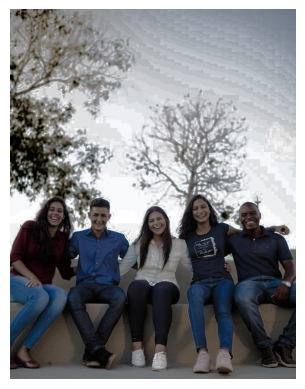

In [63]:
display_img(equalized_img)

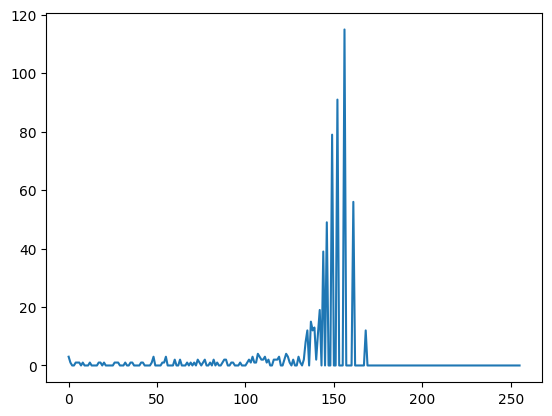

In [64]:
hist=cv2.calcHist(hsv_img[:,:,2],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

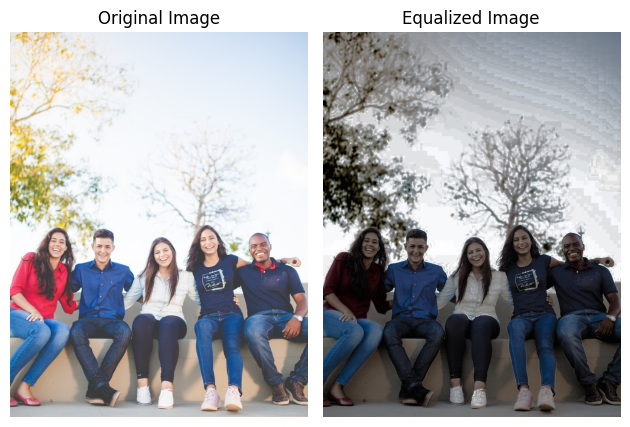

In [65]:
plot_transformation(img,equalized_img,'Equalized Image')

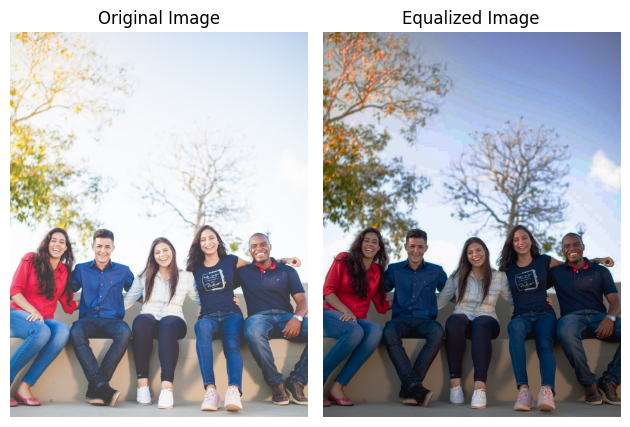

In [66]:
def histogram_equalization_of_image(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    total_pixels=np.sum(hist)
    pdf=hist/total_pixels
    cdf=pdf.cumsum()
    norm_hist=((cdf)*255).astype('uint8')
    norm_img=norm_hist[img.flatten()]
    norm_img=norm_img.reshape(img.shape)
    return norm_img
norm_img=histogram_equalization_of_image(img)
plot_transformation(img,norm_img,'Equalized Image')

<BarContainer object of 152 artists>

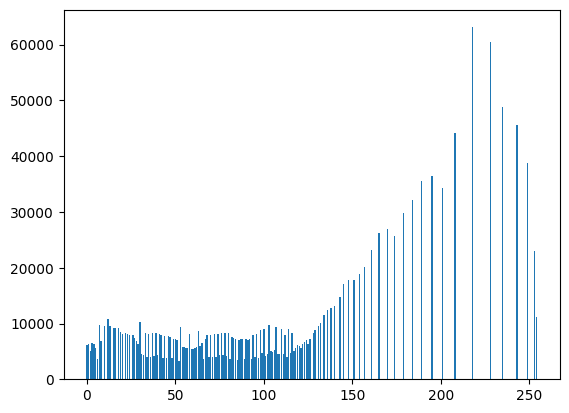

In [67]:
unique_values, counts = np.unique(norm_img.flatten(), return_counts=True)
plt.bar(unique_values,counts)